- Find or model time seies with seasonal components (more than 3 periods).
- Come up with time series model.
- Use model for prediction for 4 periods.
- Visualize initial series and prediction.
- Estimate prediction with MAPE metric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

# Importing data

In [2]:
data = pd.read_csv('../data/energy_consumption.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.sort_values(by=['Datetime'], inplace=True)
display(data)

,Datetime,PJME_MW
8734,2002-01-01 01:00:00,30393.0
8735,2002-01-01 02:00:00,29265.0
8736,2002-01-01 03:00:00,28357.0
8737,2002-01-01 04:00:00,27899.0
8738,2002-01-01 05:00:00,28057.0
...,...,...
140250,2018-08-02 20:00:00,44057.0
140251,2018-08-02 21:00:00,43256.0
140252,2018-08-02 22:00:00,41552.0
140253,2018-08-02 23:00:00,38500.0


There is too much of data so we will use only data for 8 days.

In [3]:
# Taking first 24 * 8 = 192 hours.
start_from_day = 411
data_days = data.iloc[start_from_day*24 : start_from_day*24 + 192]

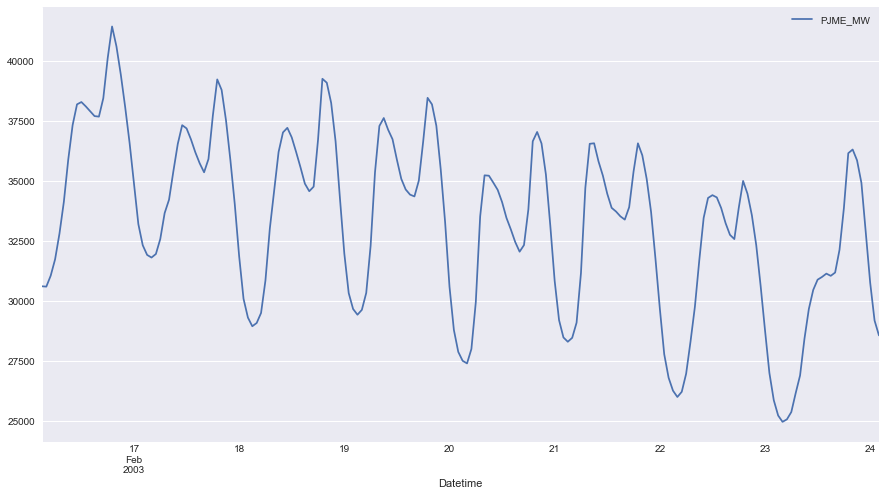

In [4]:
# Building plot.
data_days.plot(x='Datetime', y='PJME_MW', figsize=(15, 8))
plt.show()

In [5]:
x = np.array(data_days['Datetime'])
y = np.array(data_days['PJME_MW'])

# Building trend line 

In [6]:
## Splitting data to train/test samples.
split_mark = 0.5

split_point = round(len(x) * split_mark)

x_train = x[:split_point].reshape(-1,1).astype('float')
y_train = y[:split_point].reshape(-1,1).astype('float')

x_test = x[split_point:].reshape(-1,1).astype('float')
y_test = y[split_point:].reshape(-1,1).astype('float')

In [7]:
# Create linear regression object.
regr = LinearRegression()

# Train the model using the training sets.
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Making predictions on all data.
whole_data_predictions = regr.predict(x.reshape(-1,1).astype('float'))

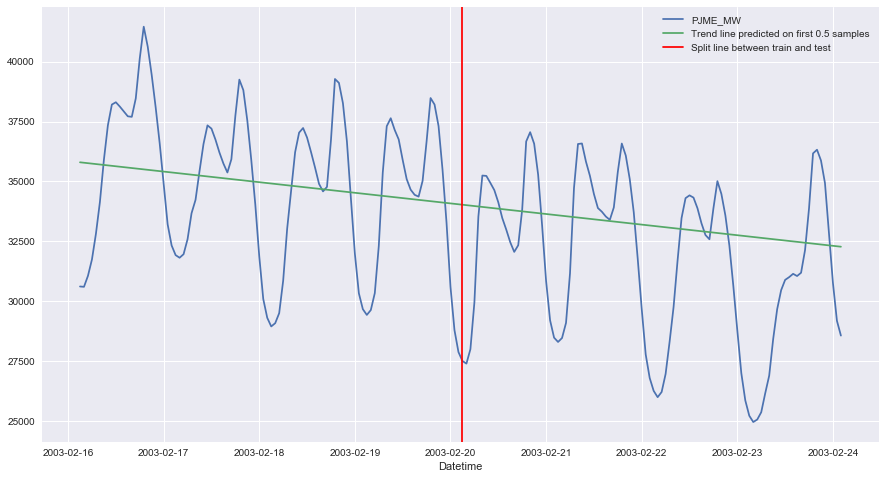

In [9]:
# Building plot.
plt.figure(figsize=(15, 8))

plt.plot(data_days['Datetime'], data_days['PJME_MW'], label='PJME_MW')
plt.plot(data_days['Datetime'], whole_data_predictions.T[0], label="Trend line predicted on first {} samples".format(split_mark))
plt.axvline(x=data_days['Datetime'].iloc[split_point], c='r', label="Split line between train and test")

plt.xlabel('Datetime')
plt.legend()

plt.show()

# Building forecast curve 

In [10]:
# Seasonal component.
seasonal_component = y_train - regr.predict(x_train.reshape(-1,1).astype('float'))

# Predictions on test data.
predictions = regr.predict(x_test.reshape(-1,1).astype('float'))

# Prediction.
forecast = predictions + seasonal_component

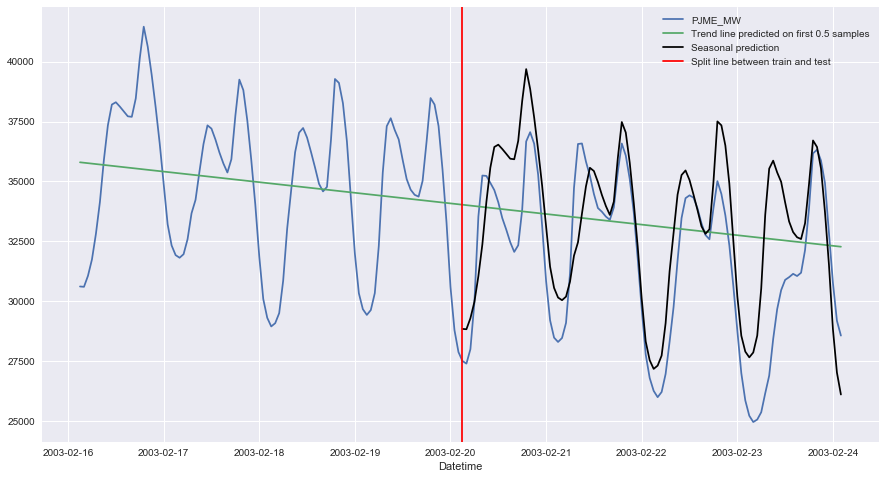

In [11]:
# Building plot.
plt.figure(figsize=(15, 8))

plt.plot(data_days['Datetime'], data_days['PJME_MW'], label='PJME_MW')
plt.plot(data_days['Datetime'], whole_data_predictions.T[0], label="Trend line predicted on first {} samples".format(split_mark))
plt.plot(data_days['Datetime'].iloc[split_point:], forecast, label="Seasonal prediction", c='k')
plt.axvline(x=data_days['Datetime'].iloc[split_point], c='r', label="Split line between train and test")

plt.xlabel('Datetime')
plt.legend()

plt.show()

# Analyzing result 

In [12]:
def squared_error(y_true, y_pred):    
    return np.sum(np.square(y_true - y_pred))

def coefficient_of_determination(y_true, y_pred):
    y_true_mean = np.mean(y_true)
    return 1 - squared_error(y_true, y_pred)/squared_error(y_true, y_true_mean)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
# Printing results.
cd_trend = coefficient_of_determination(y_test, predictions)
mae_trend = mean_absolute_percentage_error(y_test, predictions)

cd_season = coefficient_of_determination(y_test, forecast)
mae_season = mean_absolute_percentage_error(y_test, forecast)

print("Trend prediction coefficient of determination: {:.2f}".format(cd_trend))
print("Seasonal prediction coefficient of determination: {:.2f}".format(cd_season))
print("--------------------------------------------------------")
print("Trend prediction mean absolute percentage error: {:.2f}".format(mae_trend))
print("Seasonal prediction mean absolute percentage error: {:.2f}".format(mae_season))

Trend prediction coefficient of determination: -0.12
Seasonal prediction coefficient of determination: 0.43
--------------------------------------------------------
Trend prediction mean absolute percentage error: 9.48
Seasonal prediction mean absolute percentage error: 6.37
